# Salary Predictions Based on Job Descriptions

### Author: Sophia Bouchama

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The aim of this project is to predict the salary of new job postings based on previous job posting data. The job posting data consists of the following features:

In [182]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline 
#etc

__author__ = "Sophia Bouchama"
__email__ = "hello@sophiabouchama.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [183]:
#load the training data into a Pandas dataframe
df_train_features = pd.read_csv('data/train_features.csv')
df_train_salaries = pd.read_csv('data/train_salaries.csv')
df_test_features = pd.read_csv('data/test_features.csv')

In [184]:
df_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [185]:
df_train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [186]:
df_test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [187]:
print('df_train_features size:', df_train_features.shape)
print('df_train_salaries size:', df_train_salaries.shape)
print('df_test_features size:', df_test_features.shape)

df_train_features size: (1000000, 8)
df_train_salaries size: (1000000, 2)
df_test_features size: (1000000, 8)


### ---- 3 Clean the data ----

In [188]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [189]:
#Check there are no duplicate rows in the data
print(df_train_features.duplicated().sum())
print(df_train_salaries.duplicated().sum())
print(df_test_features.duplicated().sum())

0
0
0


In [190]:
# Check if there are any duplicate Job IDs in the dataframes for training data
df_train_features['jobId'].nunique()

1000000

In [191]:
df_train_salaries['jobId'].nunique()

1000000

In [192]:
df_test_features['jobId'].nunique()

1000000

We can confirm that Job ID is unique in the dataset. Since there are no duplicates, there should be a 1-1 mapping between the two train dataframes based on JobID, making it possible to merge and create one dataframe

In [193]:
# Merge the dataframes to create 1 dataframe (Inner Join)
df = pd.merge(df_train_features, df_train_salaries, on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [194]:
# Check the shape to make sure it is the size we expected
df.shape

(1000000, 9)

In [195]:
# Check dataframe is as expected and no data was lost
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [196]:
# Check if there is any missing values in our dataset
df.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

In [197]:
# Check if there is any missing values in our dataset
df_test_features.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

There is no missing data in the dataset

In [198]:
# Check the type of our features to examine if there are any data inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [199]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


All data types seem consistent with the features.

In [200]:
# Check number of unique values in the dataset
df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [201]:
df_test_features.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

We can now drop the 'Jobid' columns since ID is only used for unique job identification and probably won't provide with any useful insights or meaningful information related to salary.


In [202]:
df.drop('jobId', axis=1, inplace=True)
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


We can indentify the categorical and numerical variables in the dataset and save them in lists to work with later.

In [203]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['int64']).columns.tolist()
numerical.remove('salary')

print('categorical variables:', categorical)
print('numerical variables:', numerical)

categorical variables: ['companyId', 'jobType', 'degree', 'major', 'industry']
numerical variables: ['yearsExperience', 'milesFromMetropolis']


In our dataframe we can see that we have now have 7 features in total. We can identify the categorical and numerical values.

Categorical features:
- jobType 
- degree
- major
- industry
- companyId

Numerical features:
- yearsExperience
- milesFromMetropolis
- salary

In [204]:
# Check to see if there is any categorical values in our data set that are unmeaningful or corrupt
# Checking unique values and their value counts to see how many units of each variable we have
for feature in categorical:    
    print(df[feature].value_counts().to_frame(), '\n')

        companyId
COMP39      16193
COMP35      16114
COMP59      16066
COMP30      16041
COMP3       16028
...           ...
COMP17      15715
COMP0       15666
COMP2       15641
COMP8       15638
COMP57      15635

[63 rows x 1 columns] 

                jobType
SENIOR           125886
VICE_PRESIDENT   125235
MANAGER          125121
CTO              125046
JANITOR          124971
CEO              124778
JUNIOR           124594
CFO              124369 

             degree
HIGH_SCHOOL  236976
NONE         236854
BACHELORS    175495
DOCTORAL     175364
MASTERS      175311 

              major
NONE         532355
CHEMISTRY     58875
LITERATURE    58684
ENGINEERING   58596
BUSINESS      58518
PHYSICS       58410
COMPSCI       58382
BIOLOGY       58379
MATH          57801 

           industry
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639 



All values of the features make logical sense

In [205]:
# Display the statistical overview of the categorical data
df.describe(include=[np.object])

,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000
unique,63,8,5,9,7
top,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,16193,125886,236976,532355,143206


In [206]:
# Display the statistical overview of the numerical data
# Check minimum and maximum value for each column 
# Check for outliers or corrupt data
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


We can spot some corrupt salary data. The maximum value of 301k USD doesn't seem unusual, however it doesn't make sense to have a salary of 0. Therefore this unusually small minimum value should be be investigated further. 

The values of the other columns, 'yearsExperience' and 'milesfromMetropolis' seem to make logical sense.

Our features do not appear to be skewed since mean and median (50% percentile) are similar, this suggests that based on the distribution, we do not need to transform our data.

In [214]:
len(df.loc[df['salary'] == 0])

5

In [215]:
df[df['salary'] == 0]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


We can see that there are only 5 rows with salary value of 0. 
These rows do not logically correspond to having a salary of 0, so we can only assume that the salary data may be missing. Therefore these rows are therefore not useful.

Removing these rows should have a small effect on the dataset since 5 rows is very small compared to the total number of the dataset.

Since salary is our target feature, it doesn't make sense to impute these values as it would be biasing our dataset. Since we cannot make use of the information for these rows with a salary of '0', they will be dropped/disregarded.

In [170]:
df.drop(df[df.salary == 0].index, inplace=True)
df.shape

(999995, 8)

I decided to investigate further to see if there are any other extreme values in our dataset. 

According to the Salary Explorer website (https://salaryexplorer.com/Salaries),
the range of salaries in the US are 24k USD (lowest average) to 423k USD (highest average - actual maximum salary is higher). Therefore we expect the majority of our values to be within this range. Minimum wage in the US is approximately 15k USD according to research carried out by University of California, Davis (https://poverty.ucdavis.edu/)

This tells us that our maximum value of 301k USD is within reason. However I decided to see if there are any extreme lower values below the minimum wage value of 15k USD.

In [171]:
len(df.loc[df['salary'] < 15])

0

In [172]:
df['salary'].describe()

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

Since there are no values below 15k USD, we can assume that there are no more corrupt salary entries in our dataset as the values fall within a plausable range of 17k-301k USD. 

### ---- 4 Explore the data (EDA) ----

Now we will do EDA on our training dataframe.

In [173]:
#summarize each feature variable
#summarize the target variable
#Relationship analysis:
    #look for correlation between each feature and the target
    #look for correlation between features

#### Target variable

Visualise target variable (salary). It appears to be somewhat normally distributed 

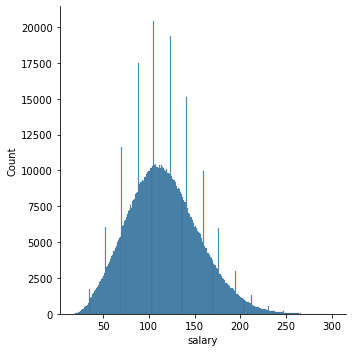

In [174]:
sns.displot(df['salary'])

#### Numerical Features

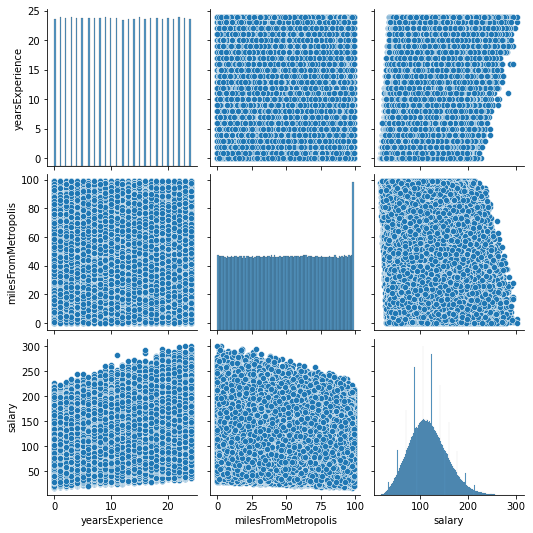

In [175]:
# Distribution plots for the numerical features by visual inspection
sns.pairplot(df)

By visual inspection we can see how the numerical variables are distributed and identify if there appears to be relationships between the variables.

Univariate plots (across the diagonal):
- yearsExperience is uniformly distributed 
- milesFromMetropolis is uniformly distrubted for the majoirty until the end.

Bivariate plots:
- There doesn't appear to be a relationship between the features themselves. The data points are very scattered showing a lot of variability.
- There appears to be some relationship between the target variable (salary) and the features. However, the data points are very scattered.
    - Some **positive** linear relationship between years experience and salary which could indicate that salary increases with experience. 
    - Some **negative** linear relationship between miles from metropolis and salary which indicates that salaries could be lower the further away they are from the metropolis.

We can analyse the variable relationship closer by using a correlation matrix using the Pearson correlation coefficient. By creating a heatmap, it enables us to visualise the correlation between the numerical variables.

In [256]:

grouped_df = df.groupby(categorical).mean()

x = grouped_df['salary']


salary,0,17,18,19,20,21,22,23,24,25,...,286,287,288,289,290,292,293,294,298,301
major,,,,,,,,,,,,,,,,,,,,,
BIOLOGY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSINESS,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,0,2,1,1,0,0
CHEMISTRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COMPSCI,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENGINEERING,2,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,2
LITERATURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MATH,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NONE,2,1,3,10,43,49,63,107,129,173,...,0,0,0,0,0,0,0,0,0,0
PHYSICS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


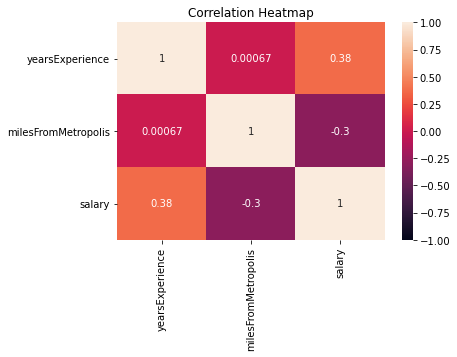

In [183]:
# We can calulcate the correlation between the numerical variables.
# Create the correlation matrix heatmap. 

corr = df.corr()
cor_heatmap = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=1, annot=True)
# Set the title
cor_heatmap.set_title('Correlation Heatmap');

- We can see that there is **some** positive correlation between yearsExperience and salary with a correlation of 0.38 suggesting a weak positive linear relationship.
- There is also **some** negative correlation between milesFromMetropolis and salary with a correlation of -0.3 suggesting a weak negative linear relationship.
- There is no correlation between milesFromMetropolis and yearsExperience

However, there no particularly strong correlations with the target variable. Therefore we cannot rely on this alone to give us any definitive conclusions about the data.

In [155]:
# We can calculate the P values to see if there is any significance in the corrlation coefficients between the variables.
print(stats.pearsonr(df['salary'], df['milesFromMetropolis']))
print(stats.pearsonr(df['salary'], df['yearsExperience']))
print(stats.pearsonr(df['milesFromMetropolis'], df['yearsExperience']))

(-0.29768642704964443, 0.0)
(0.37501340199971983, 0.0)
(0.0006718752899659752, 0.5016646487642441)


The P Values indicate that there is no evidence to suggest the significance of the correlations

#### Categorical Features

Text(0, 0.5, 'Salary')

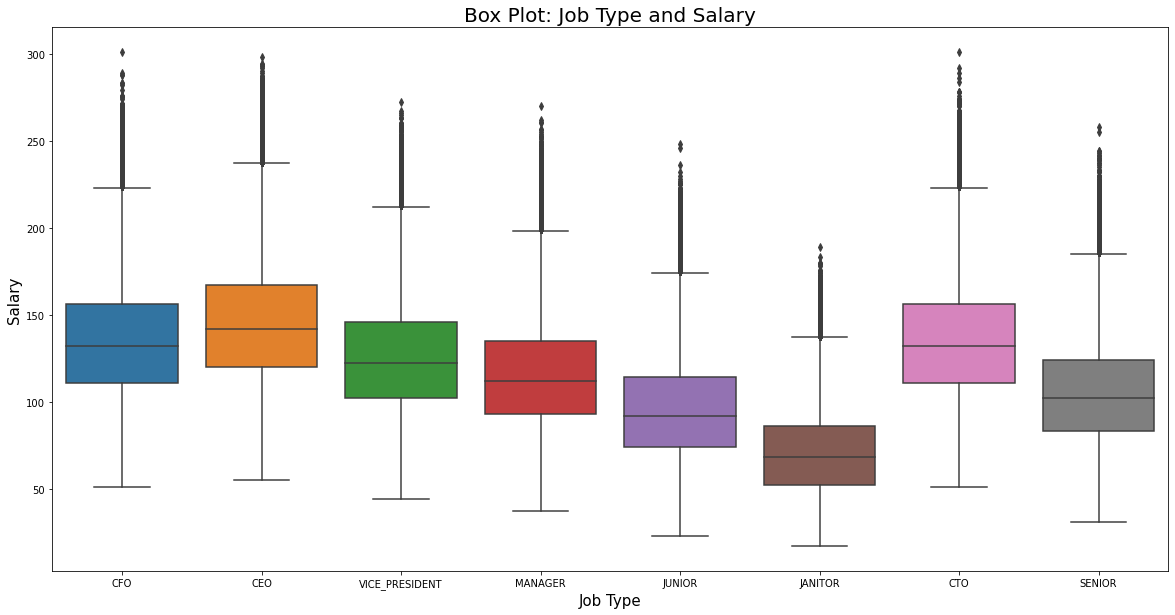

In [163]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="jobType", y="salary", data=df)
b.axes.set_title("Box Plot: Job Type and Salary",fontsize=20)
b.set_xlabel("Job Type",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

Text(0, 0.5, 'Salary')

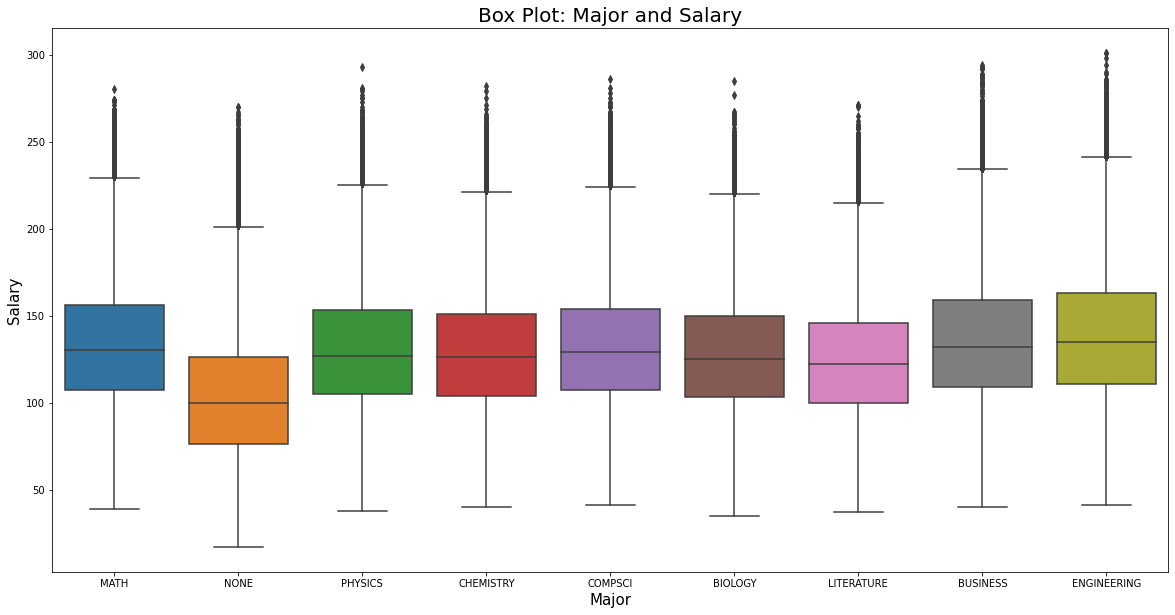

In [164]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="major", y="salary", data=df)
b.axes.set_title("Box Plot: Major and Salary",fontsize=20)
b.set_xlabel("Major",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

Text(0, 0.5, 'Salary')

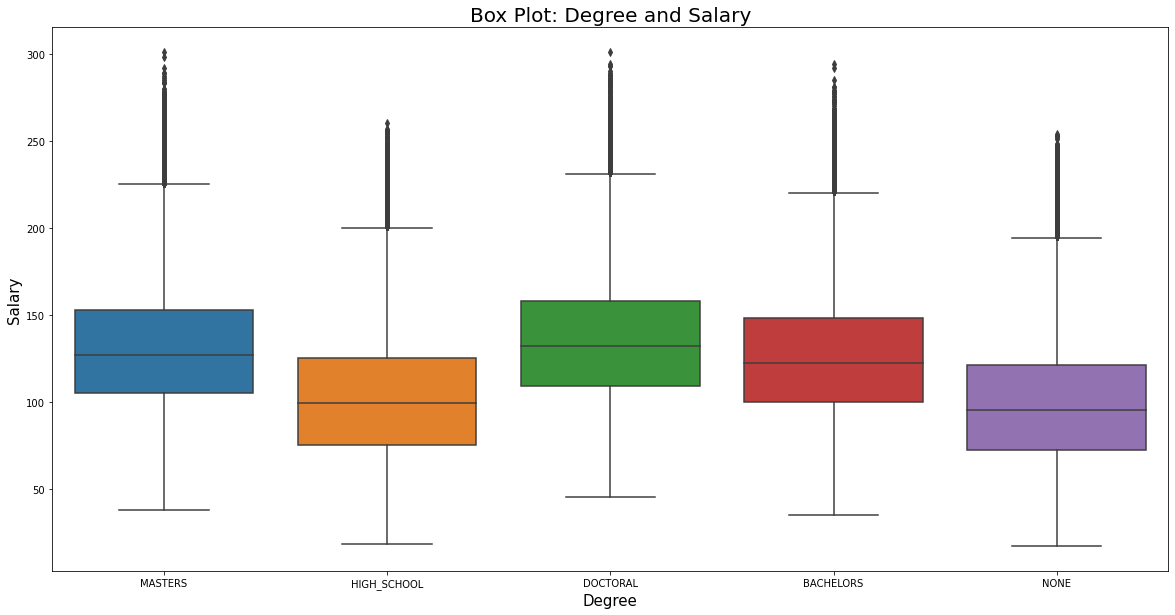

In [165]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="degree", y="salary", data=df)
b.axes.set_title("Box Plot: Degree and Salary",fontsize=20)
b.set_xlabel("Degree",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

Text(0, 0.5, 'Salary')

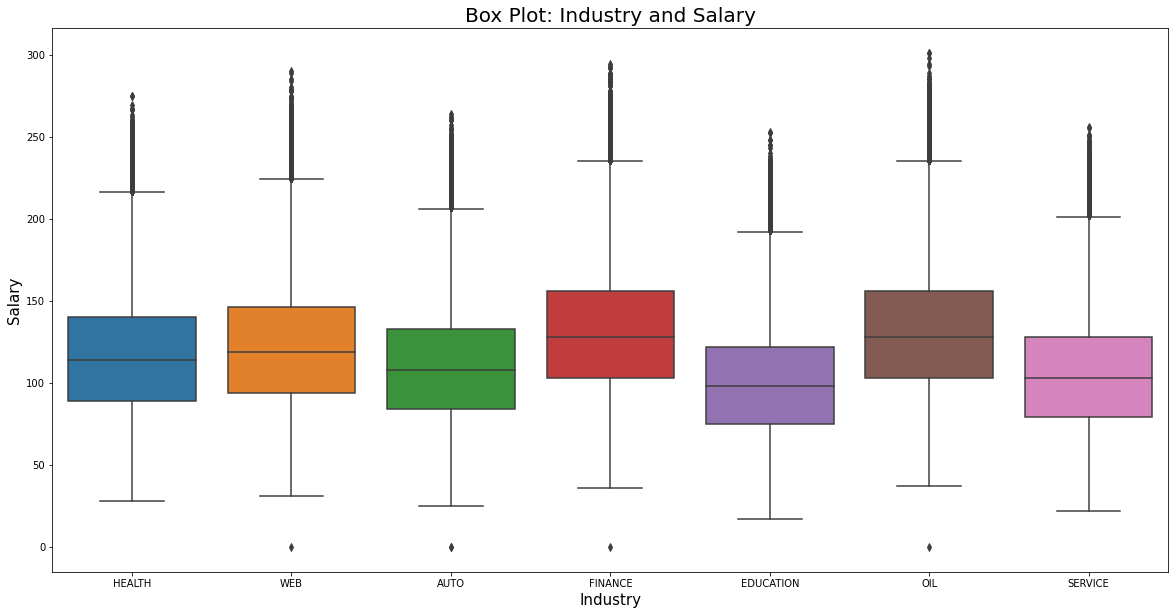

In [216]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="industry", y="salary", data=df)
b.axes.set_title("Box Plot: Industry and Salary",fontsize=20)
b.set_xlabel("Industry",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

When grouping each categorical variable by salary. We can see the following relationships:

1) Job Type:
- CEO/CTO have higher average salaries
- Janitor has the lowest average salary
- This is as expected since job type is an ordinal categorial variable
    
2) Major:
- Some salary variation but with significant overlap, therefore this indicates that major would not be a good predictor of price.
- However, 'No major' clearly has the lowest average salary 
- Engineering seems to have the highest average salary, but not conclusive enough

3) Degree:
- No degree has the lowest average salary
- Doctoral degree has the highest average salary
- This is as expected since degree is an ordinal categorial variable
    
4) Industry:
- Some salary variation
- Finance and oil seem to have the highest average salaries
- Education seems to have the lowest average salary


In [181]:
df_gptest = df[['major','degree', 'industry', 'jobType', 'salary']]
grouped_test1 = df_gptest.groupby(['major','degree', 'industry', 'jobType'],as_index=False).mean()
grouped_test1

,major,degree,industry,jobType,salary
0,BIOLOGY,BACHELORS,AUTO,CEO,139.256477
1,BIOLOGY,BACHELORS,AUTO,CFO,127.813107
2,BIOLOGY,BACHELORS,AUTO,CTO,129.357527
3,BIOLOGY,BACHELORS,AUTO,JUNIOR,89.683511
4,BIOLOGY,BACHELORS,AUTO,MANAGER,109.280374
...,...,...,...,...,...
1430,PHYSICS,MASTERS,WEB,CTO,158.518428
1431,PHYSICS,MASTERS,WEB,JUNIOR,117.012019
1432,PHYSICS,MASTERS,WEB,MANAGER,134.910377
1433,PHYSICS,MASTERS,WEB,SENIOR,128.581509


In [ ]:
corr1 = df[['jobType', 'degree', 'salary']].mean()
cor_heatmap = sns.heatmap(corr1.corr(), xticklabels=corr1.columns.values, yticklabels=corr1.columns.values, vmin=-1, vmax=1, annot=True)
# Set the title
cor_heatmap.set_title('Correlation Heatmap');

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

First of all we must cateogrise the problem:
This is a supervised learning problem since our input data is labelled.

Our target variable is salary which means the output of our model will be numerical, therefore our problem can be solved with regression.

There are many types of approaches using regression. For the baseline model, I will perform a Simple Linear Regression Model (SLR).

In [507]:
# For the baseline model, I perform a simple linear regression model
# Multiple Linear Regression — Baseline for the model
# regression is the process of predicting a continuous value.
# Salary is our dependent varible
# .... are our independent variables 
'''
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
X = df[['yearsExperience']]
Y = df['salary']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]  

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="yearsExperience", y="salary", data=df)
plt.ylim(0,)'''

pd.get_dummies(df)

,yearsExperience,milesFromMetropolis,salary,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,2,31,113,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,23,24,178,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,9,70,73,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,54,31,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,17,68,104,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data